# MIDTERM _ ID:

In [129]:
# Выгрузить данные по скрипту из csv файла.  

# Построить три графика по данным. 

# Сделать сравнительный анализ между своим и имеющимися данными (в виде графика). Например, у вас есть
# данные по скачиваю приложений и здесь данные по устройствам, постройте между ними зависимость.  

# Возьмите массив из 8 элементов и сделайте следующие операции: 

# - заполнить рандомномно; 

# - поменять 4 и 7 элемент местами; 

# - удалить 2 элемент;  

# - записать новое число в 1 элемент;  

# - сортировать по возрастанию;  

In [130]:
import pandas as pd
import numpy as np
import re
import datetime
import os
%matplotlib inline
import matplotlib

# Visualisation tools
from matplotlib import pyplot as plt
import seaborn as sns

In [131]:
data = pd.read_csv('1976-2018-house2.csv', encoding= 'unicode_escape')
display(data)

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362,False,20200424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29631,2018,Maryland,MD,24,52,52,US House,7,gen,NaN,False,NaN,NaN,True,total,272,264710,False,20200424
29632,2018,Maryland,MD,24,52,52,US House,8,gen,NaN,False,Jamie Raskin,democrat,False,total,217679,319330,False,20200424
29633,2018,Maryland,MD,24,52,52,US House,8,gen,NaN,False,Jasen Wunder,libertarian,False,total,4853,319330,False,20200424
29634,2018,Maryland,MD,24,52,52,US House,8,gen,NaN,False,John Walsh,republican,False,total,96525,319330,False,20200424


In [132]:
new_data = data[['state', 'candidate', 'candidatevotes', 'year']]

In [133]:
new_data

,state,candidate,candidatevotes,year
0,Alabama,Bill Davenport,58906,1976
1,Alabama,Jack Edwards,98257,1976
2,Alabama,NaN,7,1976
3,Alabama,J. Carole Keahey,66288,1976
4,Alabama,NaN,5,1976
...,...,...,...,...
29631,Maryland,NaN,272,2018
29632,Maryland,Jamie Raskin,217679,2018
29633,Maryland,Jasen Wunder,4853,2018
29634,Maryland,John Walsh,96525,2018


# making new_data to find statistics in New York

In [134]:
filter = new_data['state'].isin(['New York'])
new_data[filter]

,state,candidate,candidatevotes,year
734,New York,Otis G. Pike,5749,1976
735,New York,Seth C. Morgan,10269,1976
736,New York,Otis G. Pike,129779,1976
737,New York,Salvatore Nicosia,61671,1976
738,New York,Thomas J. Downey,90172,1976
...,...,...,...,...
29111,New York,Nathan D. McMurray,8090,2018
29112,New York,Chris Collins,2087,2018
29113,New York,Nathan D. McMurray,2802,2018
29114,New York,Larry Piegza,5973,2018


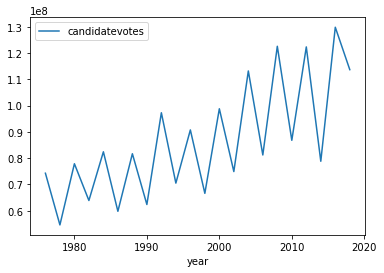

In [138]:
by_year = new_data[[x for x in new_data.columns if 'candidatevotes' in x] + ['year']]
by_year.groupby('year').sum().plot()

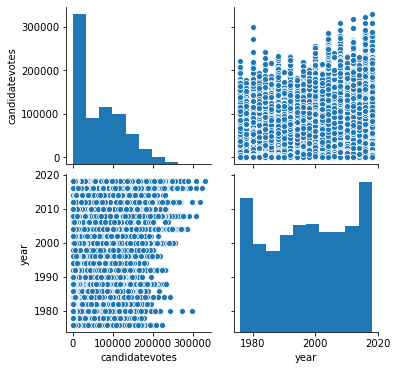

In [140]:
sns_plot = sns.pairplot(new_data)


In [106]:
votes = new_data.groupby('candidate')['candidatevotes'].sum().reset_index()
Votes_Vermont = votes.sort_values('candidatevotes',ascending=False)
Votes_Vermont

,candidate,candidatevotes
1142,Blank Vote/Scattering,10354277
4004,Edward J. Markey,3257842
6089,James L. Oberstar,3219259
10506,Nancy Pelosi,2924993
11116,Peter A. DeFazio,2897864
...,...,...
1544,Buddy Roemer III,1
6906,Jimmy Hayes,1
11648,Richard Baker,1
13954,Tillie W. Fowler,1


In [107]:
# fig, ax = plt.subplots(figsize = [16,5])
# sns.barplot(data = Votes_Vermont,x = 'candidate',y = 'candidatevotes', ax = ax)
# ax.set_ylabel('Count')
# ax.set_title('Vermont votes')
# for index,Votes_Vermont in enumerate(Votes_Vermont['candidatevotes'].astype(int)):
#        ax.text(x=index-0.1 , y =Votes_Vermont+2 , s=f"{Votes_Vermont}" , fontdict=dict(fontsize=8))
# group_by_year = new_data.loc[:, ['candidate', 'candidatevotes']].groupby('candidatevotes')
# avgs = group_by_year.mean()
# x = avgs.index
# y1 = avgs.candidatevotes
# def plot(x, y, ax, title, y_label):
#     ax.set_title(title)
#     ax.set_ylabel(y_label)
#     ax.plot(x, y)
#     ax.margins(x=0, y=0)

In [108]:
# Plot correlation matrix for given dataset and threshold
def plot_corr_matrix(data, threshold):
    # Create plot
    f = plt.figure(figsize=(12, 12))
    plt.matshow(data.corr()[data.corr().abs() > threshold], fignum=f.number)
    plt.xticks(range(data.shape[1]), data.columns, fontsize=12, rotation=90)
    plt.yticks(range(data.shape[1]), data.columns, fontsize=12)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=12)
    
    plt.show();

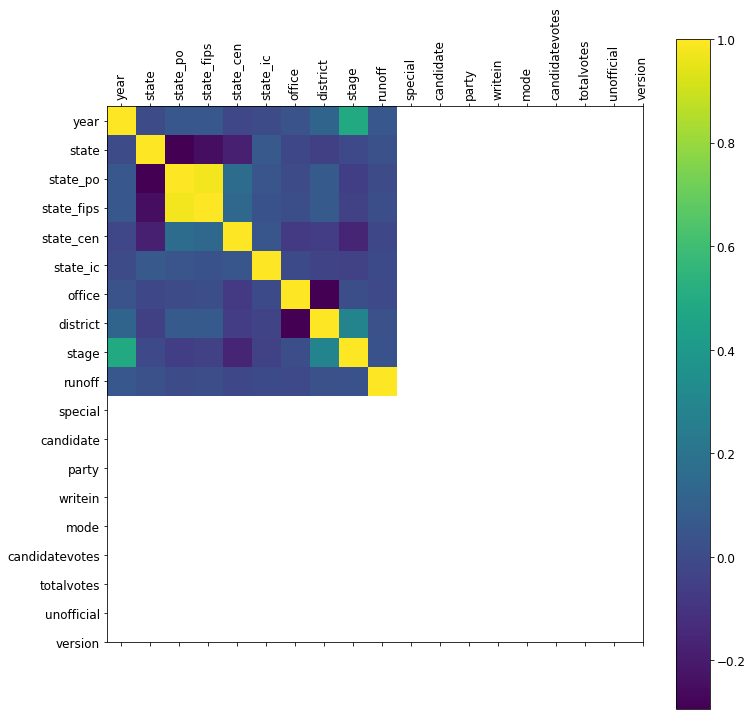

In [109]:
plot_corr_matrix(data, 0)

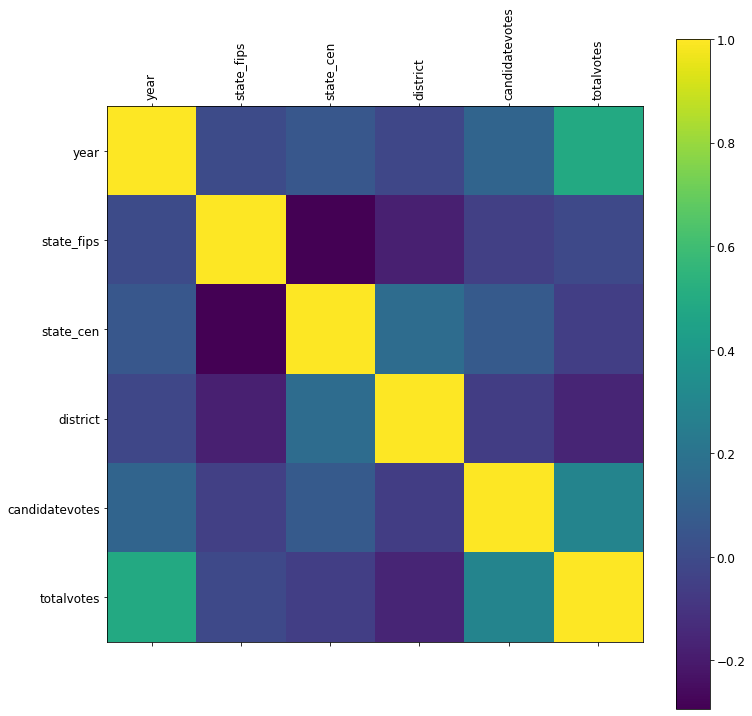

In [111]:
data = data[["year","state_fips", "state_cen", "district", "candidatevotes","totalvotes"]]
plot_corr_matrix(data, 0)

In [114]:
import random
l = [i for i in range(10)]

In [115]:
print(l)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [116]:
array.pop(1)

1

In [117]:
array.insert(0, 2)

In [118]:
array

[2, 2, 4, 5, 6, 7, 8]

In [120]:
array.sort()

In [121]:
print(array)

[2, 2, 4, 5, 6, 7, 8]


In [119]:
n= array[4]
n1= array[7]
n, n1 = n1, n


IndexError: list index out of range